In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### **Recreate plot using csv data only**

- do we need to provide markers for tickmarks, axis ranges etc?
- do we need to provide log-transformed return periods for x axis, or is it easier to use RP & plot on log axis?

In [9]:
obs = pd.read_csv("rlplot_ar-hw_obs.csv", index_col = 0)
rl_curves = pd.read_csv("rlplot_ar-hw_curves.csv", index_col = 0)
confint = pd.read_csv("rlplot_ar-hw_confint.csv", index_col = 0)
event = pd.read_csv("rlplot_ar-hw_misc.csv")

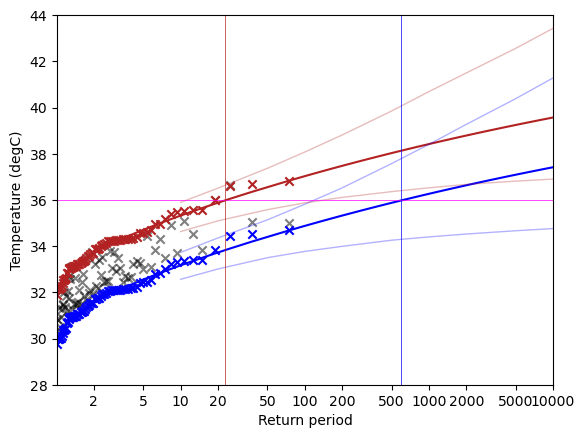

In [10]:
# plot observations & effective return levels in current & counterfactual climates
plt.scatter(obs.logrp, obs.obs, color = "k", marker = "x", alpha = 0.5)         # actual observed values & equivalent return periods

plt.scatter(obs.logrp, obs.Y_f, color = "firebrick", marker = "x")              # observed return periods vs effective return period in current climate
plt.scatter(obs.logrp, obs.Y_cf, color = "blue", marker = "x")                  # observed return periods vs effective return period in cooler climate

# add return level curves in current & counterfactual climates
plt.plot(rl_curves.logrp, rl_curves.fit_f, color = "firebrick")
plt.plot(rl_curves.logrp, rl_curves.fit_cf, color = "blue")

# plot confidence intervals
plt.plot(confint.logrp, confint.cf_lower, color = "blue", alpha = 0.3, lw = 1)
plt.plot(confint.logrp, confint.cf_upper, color = "blue", alpha = 0.3, lw = 1)

plt.plot(confint.logrp, confint.f_lower, color = "firebrick", alpha = 0.3, lw = 1)
plt.plot(confint.logrp, confint.f_upper, color = "firebrick", alpha = 0.3, lw = 1)

# add observed event
plt.axhline(event.event_value[0], color = "magenta", lw = 0.5)

# vertical lines / ticks showing the effective return period of the observed event in the present & cooler climate
plt.axvline(event.logrp_f[0], color = "firebrick", lw = 0.5)
plt.axvline(event.logrp_cf[0], color = "blue", lw = 0.5)

# fix axis labels
plt.xlabel(event.xlabel[0])
plt.ylabel(event.ylabel[0])

# fix tickmarks & axis limits 
xticks = [2,5,10,20,50,100,200,500,1000,2000,5000,10000]               # possibly hard-coded - should WWA define the axis limits, or will Tom do that? (largely aesthetic choice)
plt.xticks(ticks = np.log(xticks), labels = xticks)

plt.xlim(np.log(1.01),np.log(1e4))
plt.ylim(28,44)

plt.savefig("rlplot-example_ar-hw.png")